<a target="_blank" href="https://colab.research.google.com/github/paulotguerra/QXD0178/blob/main/01.E0-Excercicio-Limpeza-de-dados.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

## QXD0178 - Mineração de Dados
# Preparação da base de dados

**Professor:** Paulo de Tarso Guerra Oliveira ([paulodetarso@ufc.br](mailto:paulodetarso@ufc.br))


# Lista de Exercícios: Limpeza de dados

Nesta lista de exercícios, você será deverá aplicar técnicas de processamento de dados e limpeza de dados para lidar com problemas comuns encontrados em conjuntos de dados do mundo real. Aplique as técnicas aprendidas na disciplina de Mineração de Dados para tratar dados faltantes e inconsistências, tornando os dados prontos para análises subsequentes.

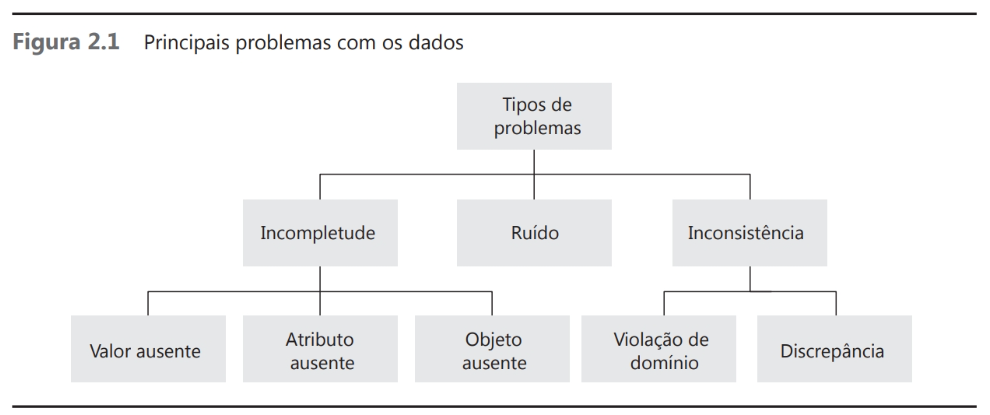

Para este exercícios será utilizada a base de dados [Food choices: College students' food and cooking preferences](https://www.kaggle.com/datasets/borapajo/food-choices?select=food_coded.csv) que contém informações sobre hábitos alimentares de um conjunto de estudantes.


Este conjunto de dados possui valores ausentes em várias colunas. Sua tarefa é:

1. Identificar todas as colunas com dados faltantes.
1. Escolher a estratégia apropriada para tratar cada tipo de dado faltante (exemplo: preenchimento com média, mediana, valor mais frequente, ou remoção de linhas com dados faltantes).
1. Identificar as inconsistências específicas no conjunto de dados, como valores fora do intervalo.
1. Desenvolver um plano de ação para lidar com cada tipo de inconsistência (por exemplo, remoção de registros, correção de valores, ou imputação).
1. Aplicar as estratégias e o plano de ação escolhidos para preencher ou remover os dados faltantes e limpar os dados inconsistentes.
1. Documentar as ações tomadas em cada etapa do processo e justificar suas decisões.

**Todos os problemas** no conjunto precisam ser detectados e as ações tomadas devidamente justificadas e documentadas neste `.ipynb`. As justificativas devem ser descritas em células do tipo *Markdown* e as operações/ajustes deve estar implementadas na célula de código imediatamente subsequênte. O texto deve ser linear e conciso.

## Pré-processamento dos dados


#### Esse notebook precisa do python 3.10 ou superior

In [153]:
! pip install nltk seaborn

  Obtaining dependency information for seaborn from https://files.pythonhosted.org/packages/7b/e5/83fcd7e9db036c179e0352bfcd20f81d728197a16f883e7b90307a88e65e/seaborn-0.13.0-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 479.7 kB/s eta 0:00:00a 0:00:01


In [3]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/deadpixel/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### Carga do conjunto de dados `food_coded.csv`

In [4]:
import numpy as np
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/She-Codes-Now/Intro-to-Data-Science-with-R/master/food_coded.csv")
df

,GPA,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food,comfort_food_reasons,comfort_food_reasons_coded,...,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
0,2.4,2,1,430,NaN,315.0,1,none,we dont have comfort,9.0,...,1.0,1.0,1,1165.0,345,car racing,5,1,1315,187
1,3.654,1,1,610,3.0,420.0,2,"chocolate, chips, ice cream","Stress, bored, anger",1.0,...,1.0,1.0,2,725.0,690,Basketball,4,2,900,155
2,3.3,1,1,720,4.0,420.0,2,"frozen yogurt, pizza, fast food","stress, sadness",1.0,...,1.0,2.0,5,1165.0,500,none,5,1,900,I'm not answering this.
3,3.2,1,1,430,3.0,420.0,2,"Pizza, Mac and cheese, ice cream",Boredom,2.0,...,1.0,2.0,5,725.0,690,NaN,3,1,1315,"Not sure, 240"
4,3.5,1,1,720,2.0,420.0,2,"Ice cream, chocolate, chips","Stress, boredom, cravings",1.0,...,1.0,1.0,4,940.0,500,Softball,4,2,760,190
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,3.5,1,1,610,4.0,420.0,2,"wine. mac and cheese, pizza, ice cream",boredom and sadness,NaN,...,1.0,1.0,5,940.0,500,Softball,5,1,1315,156
121,3,1,1,265,2.0,315.0,2,Pizza / Wings / Cheesecake,Loneliness / Homesick / Sadness,NaN,...,1.0,NaN,4,940.0,500,basketball,5,2,1315,180
122,3.882,1,1,720,NaN,420.0,1,"rice, potato, seaweed soup",sadness,NaN,...,1.0,2.0,5,580.0,690,none,4,2,1315,120
123,3,2,1,720,4.0,420.0,1,"Mac n Cheese, Lasagna, Pizza","happiness, they are some of my favorite foods",NaN,...,2.0,2.0,1,940.0,500,NaN,3,1,1315,135


In [5]:
df.shape

(125, 61)

In [6]:
def columns_with_missing_values(df):
    columns_with_null = df.columns[df.isnull().any()]
    return columns_with_null, len(columns_with_null)


def missing_values(series: pd.Series):
    print(f"Missing values in {series.name}: {series.isnull().sum()}")

In [7]:
columns_with_missing_values(df)

(Index(['GPA', 'calories_day', 'calories_scone', 'comfort_food',
        'comfort_food_reasons', 'comfort_food_reasons_coded', 'cook', 'cuisine',
        'diet_current', 'drink', 'eating_changes', 'employment', 'exercise',
        'father_education', 'father_profession', 'fav_cuisine', 'fav_food',
        'food_childhood', 'healthy_meal', 'ideal_diet', 'income',
        'life_rewarding', 'marital_status', 'meals_dinner_friend',
        'mother_education', 'mother_profession', 'on_off_campus',
        'persian_food', 'self_perception_weight', 'soup', 'sports',
        'tortilla_calories', 'type_sports', 'weight'],
       dtype='object'),
 34)

### GPA

In [8]:
missing_values(df["GPA"])

Missing values in GPA: 2


In [9]:
# Mapping all the values to a number format
def convert_to_number(v): 
    try:
        return float(v)
    except:
        return np.nan

df['GPA'] = df['GPA'].apply(convert_to_number)

# Fill null values with median
gpa_median = df['GPA'].median()
df['GPA'] = df['GPA'].fillna(gpa_median)

# Separating the GPA values into quartiles
df['GPA'] = pd.qcut(df['GPA'], 4, labels=False)

In [10]:
df.GPA.isnull().sum(), df.GPA.value_counts()

(0,
 GPA
 1    38
 0    37
 3    27
 2    23
 Name: count, dtype: int64)

### calories_day - 19 missing values

In [11]:
missing_values(df["calories_day"])

Missing values in calories_day: 19


In [12]:
calories_columns = list(filter(lambda x: 'calories' in x, df.columns))

In [13]:
# filter only numerical columns
def get_numerical_columns(df):
    return df.select_dtypes(include=[np.number]).columns.tolist()

In [14]:
df.loc[:, get_numerical_columns(df)].corr()

,GPA,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food_reasons_coded,cook,comfort_food_reasons_coded.1,...,persian_food,self_perception_weight,soup,sports,thai_food,tortilla_calories,turkey_calories,veggies_day,vitamins,waffle_calories
GPA,1.000000,-0.054119,-0.079225,0.099282,-0.013090,-1.750020e-01,-0.001330,-0.082205,0.013398,-0.100037,...,0.063387,0.014022,0.053972,-3.587650e-02,0.153350,0.002751,0.176860,0.017866,0.050559,0.007073
Gender,-0.054119,1.000000,0.130527,-0.098265,0.026548,1.548454e-01,-0.032178,0.168593,0.312014,0.209109,...,-0.019961,-0.221543,0.053185,-1.958333e-01,-0.119846,0.217066,0.152039,-0.142901,-0.035668,0.147770
breakfast,-0.079225,0.130527,1.000000,-0.029597,-0.112370,3.065903e-02,-0.089756,0.017411,-0.005896,0.018233,...,-0.148975,-0.061754,0.182244,-2.431904e-02,-0.118861,0.030242,-0.041046,-0.238174,0.092973,-0.036627
calories_chicken,0.099282,-0.098265,-0.029597,1.000000,0.420089,6.283472e-02,0.159031,-0.068259,-0.040738,-0.009311,...,-0.056234,0.044320,-0.000078,-1.153660e-01,0.088459,0.381808,0.397642,0.152477,-0.196981,0.347542
calories_day,-0.013090,0.026548,-0.112370,0.420089,1.000000,1.675793e-01,0.162121,0.018574,-0.035581,0.057909,...,0.102886,-0.034329,-0.015512,-1.546633e-01,0.147651,0.297438,0.233415,0.287142,-0.339576,0.232828
calories_scone,-0.175002,0.154845,0.030659,0.062835,0.167579,1.000000e+00,0.137510,0.266756,0.139370,0.206879,...,-0.054821,-0.108605,0.024914,-8.154390e-17,-0.245270,0.233255,-0.016898,-0.091141,-0.047728,0.364592
coffee,-0.001330,-0.032178,-0.089756,0.159031,0.162121,1.375098e-01,1.000000,-0.051484,-0.102079,-0.055205,...,0.065667,0.061485,-0.191788,3.745029e-03,0.173703,0.065235,0.061185,0.107468,-0.041804,0.071835
comfort_food_reasons_coded,-0.082205,0.168593,0.017411,-0.068259,0.018574,2.667555e-01,-0.051484,1.000000,0.041154,0.989180,...,0.064451,0.051773,-0.034423,1.692875e-01,-0.041233,0.027009,-0.041232,-0.127249,-0.076120,0.088816
cook,0.013398,0.312014,-0.005896,-0.040738,-0.035581,1.393701e-01,-0.102079,0.041154,1.000000,0.031245,...,-0.119849,-0.096362,-0.022912,-9.342771e-02,-0.128495,0.113113,0.020644,-0.099045,0.082655,0.064180
comfort_food_reasons_coded.1,-0.100037,0.209109,0.018233,-0.009311,0.057909,2.068789e-01,-0.055205,0.989180,0.031245,1.000000,...,0.078032,-0.012464,0.015257,1.288923e-01,-0.023196,0.042791,0.000043,-0.131472,-0.075948,0.090838


OBS: As we don't have any relevant correlation between calories_day and other variables, we will fill the missing values with the value 1, that's mean: `i dont know how many calories i should consume`

In [15]:
df['calories_day'].fillna(1.0, inplace=True)

In [16]:
df['calories_day'].value_counts()

calories_day
3.0    63
4.0    23
2.0    20
1.0    19
Name: count, dtype: int64

### calories_scone - 1 missing values

In [17]:
df['calories_scone'].value_counts()

calories_scone
420.0    79
980.0    23
315.0    22
Name: count, dtype: int64

In [18]:
df['calories_scone'].isnull().sum()

1

In [19]:
## the missing values will be filled with the median of the column
df['calories_scone'].fillna(df['calories_scone'].median(), inplace=True)

In [20]:
df['calories_scone'].isnull().sum()

0

### `comfort_food`(1), `comfort_food_reasons`(2), `comfort_food_reasons_coded`(19)  - 22 missing values

In [21]:
for col in ['comfort_food', 'comfort_food_reasons', 'comfort_food_reasons_coded']:
    missing_values(df[col])

Missing values in comfort_food: 1
Missing values in comfort_food_reasons: 2
Missing values in comfort_food_reasons_coded: 19


In [22]:
df[df['comfort_food_reasons'].isnull() | df['comfort_food'].isnull()]

,GPA,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food,comfort_food_reasons,comfort_food_reasons_coded,...,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
74,0,2,2,265,2.0,420.0,1,NaN,NaN,9.0,...,1.0,2.0,3,580.0,345,NaN,4,2,760,NaN
88,1,2,2,720,4.0,980.0,2,"Little Debbie snacks, donuts, pizza",NaN,9.0,...,1.0,2.0,5,1165.0,850,NaN,4,1,1315,175


In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords

def explode_values(series: pd.Series):
    return series.str.lower().str.split(',').explode().str.strip()

def get_top_n_words(series: pd.Series, n: int, preprocess=lambda x: x):
    vectorizer = TfidfVectorizer(stop_words=stopwords.words('english'), preprocessor=preprocess)
    vectorizer.fit(explode_values(series).fillna(''))
    vocab = vectorizer.vocabulary_
    # remove stop words
    return sorted(vocab.items(), key=lambda x: x[1], reverse=True)[:n]

In [24]:
get_top_n_words(df['eating_changes'], 10)

[('year', 293),
 ('wraps', 292),
 ('would', 291),
 ('worse', 290),
 ('wont', 289),
 ('willingly', 288),
 ('whatever', 287),
 ('well', 286),
 ('weight', 285),
 ('weekends', 284)]

In [25]:
get_top_n_words(df['comfort_food'], 10)

[('yogurt', 166),
 ('wings', 165),
 ('wine', 164),
 ('wegmans', 163),
 ('watermelon', 162),
 ('vinegar', 161),
 ('twizzlers', 160),
 ('tuna', 159),
 ('truffles', 158),
 ('tomato', 157)]

In [26]:
get_top_n_words(df['comfort_food_reasons'], 10)

[('yummy', 122),
 ('without', 121),
 ('winter', 120),
 ('whole', 119),
 ('well', 118),
 ('week', 117),
 ('weather', 116),
 ('watching', 115),
 ('usually', 114),
 ('upset', 113)]

In [27]:
# the missing values will be filled with the 5 most common values
from itertools import starmap

confort_food_top_5 = get_top_n_words(df['comfort_food'], 5)
comfort_food_reasons_top_5 = get_top_n_words(df['comfort_food_reasons'], 5)

def join_top_n_words(top_n_words):
    return ', '.join(starmap(lambda k, _: k, top_n_words))

In [28]:
df['comfort_food'].fillna(join_top_n_words(confort_food_top_5), inplace=True)
df['comfort_food_reasons'].fillna(join_top_n_words(comfort_food_reasons_top_5), inplace=True)

In [29]:
df.loc[:, ['comfort_food', 'comfort_food_reasons']].isnull().sum()

comfort_food            0
comfort_food_reasons    0
dtype: int64

In [30]:
# the missing values will be filled with the median of the column comfort_food_reasons_coded
df['comfort_food_reasons_coded'].fillna(df['comfort_food_reasons_coded'].median(), inplace=True)

In [31]:
columns_with_missing_values(df)

(Index(['cook', 'cuisine', 'diet_current', 'drink', 'eating_changes',
        'employment', 'exercise', 'father_education', 'father_profession',
        'fav_cuisine', 'fav_food', 'food_childhood', 'healthy_meal',
        'ideal_diet', 'income', 'life_rewarding', 'marital_status',
        'meals_dinner_friend', 'mother_education', 'mother_profession',
        'on_off_campus', 'persian_food', 'self_perception_weight', 'soup',
        'sports', 'tortilla_calories', 'type_sports', 'weight'],
       dtype='object'),
 28)

### cook - 3 missing values

In [32]:
missing_values(df["cook"])

Missing values in cook: 3


In [33]:
df['cook'].value_counts()

cook
3.0    49
2.0    34
4.0    18
1.0    13
5.0     8
Name: count, dtype: int64

In [34]:
# The missing values will be filled with the median of the column
df['cook'].fillna(df['cook'].median(), inplace=True)

### cuisine - 17 missing values

In [35]:
missing_values(df["cuisine"])

Missing values in cuisine: 17


In [36]:
# the missing values will be filled with 6, that means: other
df['cuisine'].fillna(6, inplace=True)

### diet_current - 1 missing values

In [37]:
missing_values(df["diet_current"])

Missing values in diet_current: 1


In [38]:
df["diet_current"].value_counts()

diet_current
high in protein and low in carbohydrates.                                                                                                                               1
eat good and exercise                                                                                                                                                   1
I eat about three times a day with some snacks. I try to eat healthy but it doesn't always work out that- sometimes eat fast food and mainly eat at Laker/ Egan         1
toast and fruit for breakfast, salad for lunch, usually grilled chicken and veggies (or some variation) for dinner                                                      1
protein, carbs, less fruits and vegetables, some sweets                                                                                                                 1
                                                                                                                                         

In [39]:
# the missing values will be filled with the 5 most common values
diet_current_top_words = get_top_n_words(df['diet_current'], 5)
fill_sentece = f'I eat: {join_top_n_words(diet_current_top_words)}'
df['diet_current'].fillna(fill_sentece, inplace=True)

In [40]:
columns_with_missing_values(df)

(Index(['drink', 'eating_changes', 'employment', 'exercise', 'father_education',
        'father_profession', 'fav_cuisine', 'fav_food', 'food_childhood',
        'healthy_meal', 'ideal_diet', 'income', 'life_rewarding',
        'marital_status', 'meals_dinner_friend', 'mother_education',
        'mother_profession', 'on_off_campus', 'persian_food',
        'self_perception_weight', 'soup', 'sports', 'tortilla_calories',
        'type_sports', 'weight'],
       dtype='object'),
 25)

### drink - 2 missing values

In [41]:
missing_values(df["drink"])

Missing values in drink: 2


In [42]:
df["drink"].value_counts()

drink
2.0    69
1.0    54
Name: count, dtype: int64

In [43]:
# the missing values will be filled with random value between 1 and 2
df['drink'] = df['drink'].apply(lambda x: np.random.randint(1, 2) if pd.isnull(x) else x)

### eating_changes - 3 missing values

In [44]:
missing_values(df["eating_changes"])

Missing values in eating_changes: 3


In [45]:
df['eating_changes'].value_counts()

eating_changes
none                                                                                                      2
I have learned to eat more vegetables.                                                                    1
I have increased the amounts of vegetables I eat due to the unhealthy options in our dining halls         1
Home cooked meals and a lot more difficult to have at college. It's typically quick, on the go foods.     1
i eat healthier all around                                                                                1
                                                                                                         ..
My diet is more limited just because of what I have time to make                                          1
poor                                                                                                      1
I eat more junk food                                                                                      1
I eat more ju

In [46]:
list(filter(lambda x: not (x[0][0] in 'wtuy'),
    get_top_n_words(df['eating_changes'], 60)
))

[('veggies', 279),
 ('vegetables', 278),
 ('vegetable', 277),
 ('variety', 276),
 ('swipes', 259),
 ('sweets', 258),
 ('sweats', 257),
 ('summer', 256),
 ('store', 255),
 ('stopped', 254),
 ('stop', 253),
 ('still', 252),
 ('starting', 251),
 ('started', 250),
 ('sports', 249),
 ('sport', 248),
 ('soups', 247),
 ('sometimes', 246),
 ('something', 245),
 ('soda', 244),
 ('snacks', 243),
 ('snacking', 242),
 ('snack', 241),
 ('smaller', 240),
 ('since', 239),
 ('simply', 238),
 ('self', 237),
 ('season', 236),
 ('seafood', 235),
 ('school', 234)]

In [47]:
# the missing values will be filled with the ['veggies', 'soups', 'soda', 'seafood', 'snacks'] value
fill_sentece = 'I have learned about: veggies, soups, soda, seafood, snacks'
df['eating_changes'].fillna(fill_sentece, inplace=True)

In [48]:
columns_with_missing_values(df)

(Index(['employment', 'exercise', 'father_education', 'father_profession',
        'fav_cuisine', 'fav_food', 'food_childhood', 'healthy_meal',
        'ideal_diet', 'income', 'life_rewarding', 'marital_status',
        'meals_dinner_friend', 'mother_education', 'mother_profession',
        'on_off_campus', 'persian_food', 'self_perception_weight', 'soup',
        'sports', 'tortilla_calories', 'type_sports', 'weight'],
       dtype='object'),
 23)

### employment - 9 missing values

In [49]:
missing_values(df["employment"])

Missing values in employment: 9


In [50]:
df["employment"].value_counts()

employment
2.0    60
3.0    54
1.0     2
Name: count, dtype: int64

In [51]:
## the missing values will be filled with 'other(4)'
df['employment'].fillna(4, inplace=True)

In [52]:
columns_with_missing_values(df)

(Index(['exercise', 'father_education', 'father_profession', 'fav_cuisine',
        'fav_food', 'food_childhood', 'healthy_meal', 'ideal_diet', 'income',
        'life_rewarding', 'marital_status', 'meals_dinner_friend',
        'mother_education', 'mother_profession', 'on_off_campus',
        'persian_food', 'self_perception_weight', 'soup', 'sports',
        'tortilla_calories', 'type_sports', 'weight'],
       dtype='object'),
 22)

### exercise - 13 missing values

In [53]:
missing_values(df["exercise"])

Missing values in exercise: 13


In [54]:
df["exercise"].value_counts()

exercise
1.0    57
2.0    44
3.0    11
Name: count, dtype: int64

<Axes: >

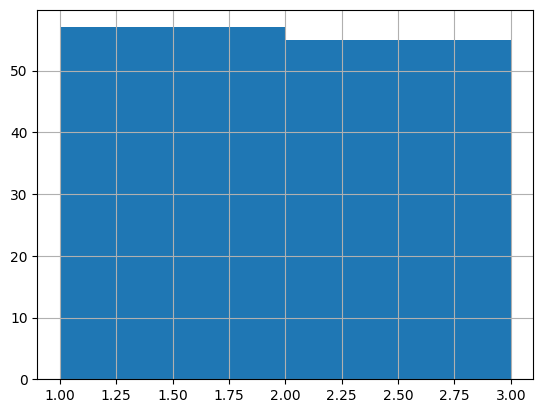

In [55]:
df["exercise"].hist(bins=2, backend='matplotlib')

In [56]:
# the missing values will be filled with 2 that represents the middle of the histogram
df['exercise'].fillna(2, inplace=True)

In [57]:
columns_with_missing_values(df)

(Index(['father_education', 'father_profession', 'fav_cuisine', 'fav_food',
        'food_childhood', 'healthy_meal', 'ideal_diet', 'income',
        'life_rewarding', 'marital_status', 'meals_dinner_friend',
        'mother_education', 'mother_profession', 'on_off_campus',
        'persian_food', 'self_perception_weight', 'soup', 'sports',
        'tortilla_calories', 'type_sports', 'weight'],
       dtype='object'),
 21)

### father and mother infos

In [58]:
fm_cols = ['father_education', 'mother_education', 'father_profession', 'mother_profession']
df[fm_cols].isnull().sum()

father_education     1
mother_education     3
father_profession    3
mother_profession    2
dtype: int64

In [59]:
df['father_education'].value_counts()

father_education
4.0    46
2.0    34
5.0    28
3.0    12
1.0     4
Name: count, dtype: int64

In [60]:
df['mother_education'].value_counts()

mother_education
4.0    46
2.0    30
5.0    23
3.0    18
1.0     5
Name: count, dtype: int64

In [61]:
# the missing values will be filled with the mode of the column
df['father_education'].fillna(df['father_education'].mode()[0], inplace=True)
df['mother_education'].fillna(df['mother_education'].mode()[0], inplace=True)

In [62]:
def remove_work_stopwords(x: str):
    import re
    return re.sub(r'work*|working|workaholic|vice|unknown|york', '', x)

In [63]:
father_prof_top_10 = get_top_n_words(df['father_profession'], 10, remove_work_stopwords)
mother_prof_top_10 = get_top_n_words(df['mother_profession'], 10, remove_work_stopwords)

In [64]:
father_prof_top_10

[('welder', 140),
 ('waste', 139),
 ('vp', 138),
 ('ups', 137),
 ('united', 136),
 ('union', 135),
 ('truck', 134),
 ('transportation', 133),
 ('trader', 132),
 ('therapist', 131)]

In [65]:
mother_prof_top_10

[('yoga', 148),
 ('wwf', 147),
 ('woman', 146),
 ('wild', 145),
 ('wife', 144),
 ('unemployed', 143),
 ('underwiriter', 142),
 ('treasurer', 141),
 ('travel', 140),
 ('traffic', 139)]

In [66]:
# the missing values will be filled with the most common value
df['father_profession'].fillna("welder", inplace=True)
df['mother_profession'].fillna("yoga teacher", inplace=True)

In [67]:
columns_with_missing_values(df)

(Index(['fav_cuisine', 'fav_food', 'food_childhood', 'healthy_meal',
        'ideal_diet', 'income', 'life_rewarding', 'marital_status',
        'meals_dinner_friend', 'on_off_campus', 'persian_food',
        'self_perception_weight', 'soup', 'sports', 'tortilla_calories',
        'type_sports', 'weight'],
       dtype='object'),
 17)

### fav_cuisine - 2 missing values

In [68]:
missing_values(df["fav_cuisine"])

Missing values in fav_cuisine: 2


In [69]:
df["cuisine"].value_counts()

cuisine
1.0    86
6.0    19
2.0    13
3.0     3
4.0     3
5.0     1
Name: count, dtype: int64

In [70]:
get_top_n_words(df['fav_cuisine'], 10)

[('wraps', 49),
 ('vietnamese', 48),
 ('type', 47),
 ('turkish', 46),
 ('tso', 45),
 ('thai', 44),
 ('sushi', 43),
 ('sub', 42),
 ('style', 41),
 ('spanish', 40)]

In [71]:
# the missing values will be filled with the five most common values: vietnamese, turkish, thai, japanese and spanish
df['fav_cuisine'].fillna('I like these: vietnamese, turkish, thai, japanese, spanish', inplace=True)

In [72]:
columns_with_missing_values(df)

(Index(['fav_food', 'food_childhood', 'healthy_meal', 'ideal_diet', 'income',
        'life_rewarding', 'marital_status', 'meals_dinner_friend',
        'on_off_campus', 'persian_food', 'self_perception_weight', 'soup',
        'sports', 'tortilla_calories', 'type_sports', 'weight'],
       dtype='object'),
 16)

In [73]:
df["fav_food"].value_counts()

fav_food
1.0    73
3.0    38
2.0    12
Name: count, dtype: int64

In [74]:
# the missing values will be filled with 3 that represents: both bought at store and cooked at home
df['fav_food'].fillna(3, inplace=True)

### food_childhood - 1 missing values

In [75]:
missing_values(df["food_childhood"])

Missing values in food_childhood: 1


In [76]:
food_childhood_top10 = get_top_n_words(df['food_childhood'], 10)
food_childhood_top10

[('wings', 132),
 ('wing', 131),
 ('wedding', 130),
 ('waffles', 129),
 ('vegetable', 128),
 ('ugali', 127),
 ('turkey', 126),
 ('tuna', 125),
 ('tortellini', 124),
 ('tons', 123)]

In [77]:
del food_childhood_top10[1]
del food_childhood_top10[-1]

In [78]:
food_childhood_top10

[('wings', 132),
 ('wedding', 130),
 ('waffles', 129),
 ('vegetable', 128),
 ('ugali', 127),
 ('turkey', 126),
 ('tuna', 125),
 ('tortellini', 124)]

In [79]:
## the missing values will be filled with the eight most common values:
df['food_childhood'].fillna(join_top_n_words(food_childhood_top10), inplace=True)

### healthy_meal - 1 missing values

In [80]:
missing_values(df["healthy_meal"])

Missing values in healthy_meal: 1


In [81]:
def healthy_meal_preprocess(word: str):
    import re
    return re.sub(r'would|without|whole|white|well', '', word)

In [82]:
get_top_n_words(df['healthy_meal'], 5, healthy_meal_preprocess)

[('zucchini', 203),
 ('water', 202),
 ('vitamins', 201),
 ('vinaigrette', 200),
 ('vegtables', 199)]

In [83]:
# the missing values will be filled with the five most common values: zucchini, water, vitamins, vinaiigrette and vegtables
df['healthy_meal'].fillna('zucchini, water, vitamins, vinaiigrette, vegtables', inplace=True)

In [84]:
columns_with_missing_values(df)

(Index(['ideal_diet', 'income', 'life_rewarding', 'marital_status',
        'meals_dinner_friend', 'on_off_campus', 'persian_food',
        'self_perception_weight', 'soup', 'sports', 'tortilla_calories',
        'type_sports', 'weight'],
       dtype='object'),
 13)

### ideal_diet

In [85]:
def diet_preprocess(word: str):    
    words = r'wouldnt|would|workouts|workout|working|without|wish|wholesome|white|wheat|whatever|well|weight|week|way'

    import re
    return re.sub(words, '', word)

In [86]:
get_top_n_words(df['ideal_diet'], 30, diet_preprocess)

[('water', 330),
 ('want', 329),
 ('veggies', 328),
 ('vegetarian', 327),
 ('vegetables', 326),
 ('vegetable', 325),
 ('vegan', 324),
 ('veg', 323),
 ('variety', 322),
 ('varienty', 321),
 ('usually', 320),
 ('unhealthy', 319),
 ('type', 318),
 ('turkey', 317),
 ('tuna', 316),
 ('trying', 315),
 ('try', 314),
 ('together', 313),
 ('toast', 312),
 ('times', 311),
 ('time', 310),
 ('throughout', 309),
 ('though', 308),
 ('think', 307),
 ('things', 306),
 ('thing', 305),
 ('tasty', 304),
 ('tastes', 303),
 ('sweets', 302),
 ('sustainance', 301)]

In [87]:
# the missing values will be filled with the five most common values: water, veggies, turkey, tuna, sweets
df['ideal_diet'].fillna('water, veggies, turkey, tuna, sweets', inplace=True)

In [88]:
columns_with_missing_values(df)

(Index(['income', 'life_rewarding', 'marital_status', 'meals_dinner_friend',
        'on_off_campus', 'persian_food', 'self_perception_weight', 'soup',
        'sports', 'tortilla_calories', 'type_sports', 'weight'],
       dtype='object'),
 12)

### income

In [89]:
missing_values(df["income"])

Missing values in income: 1


In [90]:
df["income"].value_counts()

income
6.0    41
5.0    33
4.0    20
3.0    17
2.0     7
1.0     6
Name: count, dtype: int64

In [91]:
# the missing values will be filled with the median of the column
df['income'].fillna(df['income'].median(), inplace=True)

In [92]:
columns_with_missing_values(df)

(Index(['life_rewarding', 'marital_status', 'meals_dinner_friend',
        'on_off_campus', 'persian_food', 'self_perception_weight', 'soup',
        'sports', 'tortilla_calories', 'type_sports', 'weight'],
       dtype='object'),
 11)

### life_rewarding

In [93]:
missing_values(df["life_rewarding"])

Missing values in life_rewarding: 1


In [94]:
df["life_rewarding"].value_counts()

life_rewarding
1.0     23
8.0     18
3.0     15
7.0     14
2.0     13
9.0     11
5.0     10
10.0    10
4.0      6
6.0      4
Name: count, dtype: int64

In [95]:
# the missing values will be filled with the median of the column
df['life_rewarding'].fillna(df['life_rewarding'].median(), inplace=True)

In [96]:
columns_with_missing_values(df)

(Index(['marital_status', 'meals_dinner_friend', 'on_off_campus',
        'persian_food', 'self_perception_weight', 'soup', 'sports',
        'tortilla_calories', 'type_sports', 'weight'],
       dtype='object'),
 10)

### marital_status

In [97]:
missing_values(df["marital_status"])

Missing values in marital_status: 1


In [98]:
df["marital_status"].value_counts()

marital_status
1.0    64
2.0    59
4.0     1
Name: count, dtype: int64

In [99]:
# the missing values will be filled with the median of the column
df['marital_status'].fillna(df['marital_status'].median(), inplace=True)

In [100]:
columns_with_missing_values(df)

(Index(['meals_dinner_friend', 'on_off_campus', 'persian_food',
        'self_perception_weight', 'soup', 'sports', 'tortilla_calories',
        'type_sports', 'weight'],
       dtype='object'),
 9)

### meals_dinner_friend - 3 missing values

In [101]:
missing_values(df["meals_dinner_friend"])

Missing values in meals_dinner_friend: 3


In [102]:
df["meals_dinner_friend"].value_counts()

meals_dinner_friend
Chicken, Steak, Pasta                              2
Rice with vegetables, chicken with pasta, salad    1
burritos, pasta, chicken                           1
Pasta, pizza, and chicken                          1
Pizza, Chicken and rice and pasta                  1
                                                  ..
pasta, lasagna, chicken                            1
Chicken Parmesan, pasta,                           1
Pasta,Sushi,Steak                                  1
pasta, chicken with potatoes, pizza                1
Tacos, spaghetti, grilled cheese                   1
Name: count, Length: 121, dtype: int64

In [103]:
get_top_n_words(df['meals_dinner_friend'], 10)

[('ziti', 157),
 ('would', 156),
 ('wine', 155),
 ('wedding', 154),
 ('want', 153),
 ('vietnamese', 152),
 ('veggies', 151),
 ('veggie', 150),
 ('vegetables', 149),
 ('veal', 148)]

In [104]:
# the missing values will be filled with the five most common values: ziti, wine, wedding, vietnamese, veggies
df['meals_dinner_friend'].fillna('ziti, wine, wedding, vietnamese, veggies', inplace=True)

### on_off_campus

In [105]:
missing_values(df["on_off_campus"])

Missing values in on_off_campus: 1


In [106]:
df["on_off_campus"].value_counts()

on_off_campus
1.0    97
2.0    16
3.0     9
4.0     2
Name: count, dtype: int64

In [107]:
# the missing values will be filled with the mode of the column
df['on_off_campus'].fillna(df['on_off_campus'].mode().astype('float')[0], inplace=True)

In [108]:
df['on_off_campus'].value_counts()

on_off_campus
1.0    98
2.0    16
3.0     9
4.0     2
Name: count, dtype: int64

### persian_food

In [109]:
df["persian_food"].value_counts()

persian_food
1.0    30
3.0    29
2.0    26
5.0    23
4.0    16
Name: count, dtype: int64

In [110]:
# the missing values will be filled with the mode of the column
df['persian_food'].fillna(df['persian_food'].mode().astype('float')[0], inplace=True)

### self_perception_weight

In [111]:
df["self_perception_weight"].value_counts()

self_perception_weight
3.0    45
4.0    31
2.0    31
5.0     6
1.0     6
6.0     5
Name: count, dtype: int64

In [112]:
# the missing values will be filled with the median of the column
df['self_perception_weight'].fillna(df['self_perception_weight'].median(), inplace=True)

### sports

In [113]:
df["sports"].value_counts()

sports
1.0    75
2.0    48
Name: count, dtype: int64

In [114]:
# the missing values will be filled with the mode of the column
df['sports'].fillna(df['sports'].mode().astype('float')[0], inplace=True)

### tortilla_calories

In [115]:
columns_with_missing_values(df)

(Index(['soup', 'tortilla_calories', 'type_sports', 'weight'], dtype='object'),
 4)

In [116]:
df["tortilla_calories"].value_counts()

tortilla_calories
1165.0    46
940.0     43
725.0     22
580.0     13
Name: count, dtype: int64

In [117]:
# the missing values will be filled with the mode of the column
df['tortilla_calories'].fillna(df['tortilla_calories'].mode().astype('float')[0], inplace=True)

### type_sports

In [118]:
missing_values(df["type_sports"])

Missing values in type_sports: 26


In [119]:
df["type_sports"].value_counts()

type_sports
none                                        8
Hockey                                      7
softball                                    4
Soccer                                      4
Softball                                    3
                                           ..
rowing                                      1
tennis                                      1
Recreational Basketball, Equestrian Team    1
Rec Volleyball                              1
Dancing                                     1
Name: count, Length: 66, dtype: int64

In [120]:
get_top_n_words(df['type_sports'], 10)

[('wrestling', 55),
 ('water', 54),
 ('volleyball', 53),
 ('used', 52),
 ('track', 51),
 ('though', 50),
 ('tennis', 49),
 ('team', 48),
 ('sport', 47),
 ('softball', 46)]

In [121]:
# the missing values will be filled with the five most common values: wrestling, sports in the water, volleyball, tennis, softball
df['type_sports'].fillna('wrestling, sports in the water, volleyball, tennis, softball', inplace=True)

### weight

In [122]:
missing_values(df["weight"])

Missing values in weight: 2


In [123]:
def get_string_of_number(v: str):
    try:
        return float(v)
    except:
        if any(char.isdigit() for char in v):
            return float(''.join(filter(str.isdigit, v)))
        return np.nan

In [124]:
df["weight"] = df["weight"].apply(get_string_of_number)

In [125]:
# the missing values will be filled with the avarage of the column
df['weight'].fillna(df['weight'].mean(), inplace=True)

### soup

In [126]:
missing_values(df["soup"])

Missing values in soup: 1


In [127]:
df.loc[df["soup"].isna(), "soup"] = df["soup"].mode()[0]

### self_perception_overweight com valor: True se a coluna self_perception_weight tem valor 4 ou 5; e False, caso contrário. 

In [128]:
df["self_perception_overweight"] = df["self_perception_weight"].isin([4, 5])

In [129]:
df.drop(columns=['self_perception_weight'], inplace=True)

### Create coding to categorical variables

In [130]:
import re
from collections import Counter

def get_first_word_from_string(v: str):
    separator_regex = r'[.,/]'
    return re.split(separator_regex, v)[0].lower().strip()


def get_vocab(series: pd.Series):
    return Counter(explode_values(series).fillna(''))


def apply_code_to_first_option(df: pd.DataFrame, series_name: pd.Series):
    df['first_' + series_name] = df[series_name].apply(get_first_word_from_string)
    vocab = get_vocab(df['first_' + series_name])
    df[series_name + '_coded'] = df['first_' + series_name].apply(lambda x: vocab[x])

    df.drop(columns=['first_' + series_name], inplace=True)
    return df[series_name + '_coded']

### Create a coding to categorical variables: `'fav_cuisine', 'healthy_meal', 'meals_dinner_friend', 'type_sports', 'comfort_food'`

In [131]:
categorical_columns = [
    'fav_cuisine',
    'healthy_meal',
    'meals_dinner_friend',
    'type_sports',
    'comfort_food',
    'diet_current',
    'eating_changes',
    'father_profession',
    'mother_profession',
    'food_childhood',
    'ideal_diet'
]

In [132]:
for categorical_column in categorical_columns:
    df[categorical_column + "_coded"] = apply_code_to_first_option(df, categorical_column)

### Dropping categorical variables

In [133]:
df.drop(columns=[*categorical_columns, 'comfort_food_reasons'], inplace=True)    

### Data split

In [134]:
from sklearn.model_selection import train_test_split

In [135]:
X = df.drop(columns=['self_perception_overweight'])
y = df["self_perception_overweight"]

In [136]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Machine Learning

In this section, we will test the following algorithms:

- `Naive Bayes`: The Naive Bayes classifier is a simple probabilistic classifier which is based on Bayes theorem with strong and naïve independence assumptions. It is one of the most basic text classification techniques with various applications in email spam detection, personal email sorting, document categorization, sexually explicit content detection, language detection and sentiment detection.
- `K-Nearest Neighbors`: The KNN algorithm assumes that similar things exist in close proximity. In other words, similar things are near to each other. KNN captures the idea of similarity (sometimes called distance, proximity, or closeness) with some mathematics we might have learned in our childhood— calculating the distance between points on a graph.
- `Support Vector Machine`: A Support Vector Machine (SVM) performs classification by finding the hyperplane that maximizes the margin between the two classes. The vectors (cases) that define the hyperplane are the support vectors.
- `Decision Trees`: Decision Trees (DTs) are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features.
- `Random Forest`: Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks that operates by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes or mean/average prediction of the individual trees.
- `Multilayer Perceptron`: Multilayer Perceptron (MLP) is a supervised learning algorithm that learns a function by training on a dataset, where is the number of dimensions for input and is the number of dimensions for output. Given a set of features and a target, it can learn a non-linear function approximator for either classification or regression.


In [160]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

from tqdm import tqdm

In [138]:
def run_classification_algorithms(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    classifiers: dict[str, ] = {
        'Naive Bayes': GaussianNB(),
        'K-Nearest Neighbors': KNeighborsClassifier(),
        'Support Vector Machine (Linear)': SVC(kernel='linear'),
        'Support Vector Machine (RBF)': SVC(kernel='rbf'),
        'Decision Trees': DecisionTreeClassifier(),
        'Random Forest': RandomForestClassifier(),
        'Multilayer Perceptron': MLPClassifier()
    }

    results = {}

    for name, classifier in tqdm(classifiers.items(), desc="Algorithms Progress"):
        classifier.fit(X_train, y_train)
        
        y_pred = classifier.predict(X_test)
        
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        conf_matrix = confusion_matrix(y_test, y_pred)
        
        results[name] = {
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1 Score': f1,
            'Confusion Matrix': conf_matrix
        }

    return results


In [139]:
df.head()

,GPA,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food_reasons_coded,cook,comfort_food_reasons_coded.1,...,waffle_calories,weight,self_perception_overweight,healthy_meal_coded,meals_dinner_friend_coded,type_sports_coded,comfort_food_coded,father_profession_coded,mother_profession_coded,food_childhood_coded
0,0,2,1,430,1.0,315.0,1,9.0,2.0,9,...,1315,187.00000,False,1,1,1,1,1,4,1
1,2,1,1,610,3.0,420.0,2,1.0,3.0,1,...,900,155.00000,False,1,21,4,16,2,1,2
2,1,1,1,720,4.0,420.0,2,1.0,1.0,1,...,900,159.04918,False,1,1,11,1,1,1,6
3,0,1,1,430,3.0,420.0,2,2.0,2.0,2,...,1315,240.00000,True,1,1,30,15,2,1,1
4,1,1,1,720,2.0,420.0,2,1.0,1.0,1,...,760,190.00000,True,1,3,8,14,2,1,9


In [140]:
columns_with_missing_values(df)

(Index([], dtype='object'), 0)

In [141]:
results = run_classification_algorithms(X_train, y_train)

Algorithms Progress:  43%|████▎     | 3/7 [00:01<00:02,  1.59it/s]/home/deadpixel/miniconda3/envs/data-mining/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/deadpixel/miniconda3/envs/data-mining/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
Algorithms Progress: 100%|██████████| 7/7 [00:02<00:00,  3.41it/s]


In [155]:
pd.DataFrame(results)

,Naive Bayes,K-Nearest Neighbors,Support Vector Machine (Linear),Support Vector Machine (RBF),Decision Trees,Random Forest,Multilayer Perceptron
Accuracy,0.15,0.7,0.5,0.8,0.85,0.8,0.3
Precision,0.157895,0.375,0.285714,0.0,0.6,0.5,0.0
Recall,0.75,0.75,1.0,0.0,0.75,0.25,0.0
F1 Score,0.26087,0.5,0.444444,0.0,0.666667,0.333333,0.0
Confusion Matrix,"[[0, 16], [1, 3]]","[[11, 5], [1, 3]]","[[6, 10], [0, 4]]","[[16, 0], [4, 0]]","[[14, 2], [1, 3]]","[[15, 1], [3, 1]]","[[6, 10], [4, 0]]"


### Validacao cruzada

In [143]:
def get_hyperparameter_grid(classifier_name):

    match classifier_name:
        case 'Naive Bayes':
            return {}

        case 'K-Nearest Neighbors':
            return {
                'n_neighbors': [3, 5, 7],
                'weights': ['uniform', 'distance'],
                'p': [1, 2]
            }
        case 'Support Vector Machine (Linear)' | 'Support Vector Machine (RBF)':
            return {
                'C': [0.1, 1, 10],
                'gamma': ['scale', 'auto', 0.1, 1],
            }

        case 'Decision Trees':
            return {
                'max_depth': [None, 5, 10, 20],
                'min_samples_split': [2, 5, 10],
                'min_samples_leaf': [1, 2, 4],
            }

        case 'Random Forest':
            return {
                'n_estimators': [50, 100, 200],
                'max_depth': [None, 5, 10, 20],
                'min_samples_split': [2, 5, 10],
                'min_samples_leaf': [1, 2, 4],
            }

        case 'Multilayer Perceptron':
            return {
                'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
                'activation': ['relu', 'logistic'],
                'alpha': [0.0001, 0.001, 0.01],
            }

In [144]:
def run_cross_classification_algorithms(X, y, num_folds=5, grid_search=False):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    classifiers = {
        'Naive Bayes': GaussianNB(),
        'K-Nearest Neighbors': KNeighborsClassifier(),
        'Support Vector Machine (Linear)': SVC(kernel='linear'),
        'Support Vector Machine (RBF)': SVC(kernel='rbf'),
        'Decision Trees': DecisionTreeClassifier(),
        'Random Forest': RandomForestClassifier(),
        'Multilayer Perceptron': MLPClassifier()
    }

    results = {}

    for name, classifier in tqdm(classifiers.items(), desc="Algorithms Progress"):
        if grid_search:
            param_grid = get_hyperparameter_grid(name)
            grid_classifier = GridSearchCV(classifier, param_grid, scoring='accuracy', cv=num_folds)
            grid_classifier.fit(X_train, y_train)
            classifier = grid_classifier.best_estimator_
        
        cv_scores = cross_val_score(classifier, X_train, y_train, cv=num_folds, scoring='accuracy')
        
        classifier.fit(X_train, y_train)
        
        y_pred = classifier.predict(X_test)
        
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        conf_matrix = confusion_matrix(y_test, y_pred)
        
        results[name] = {
            'CV Scores': cv_scores,
            'Average CV Accuracy': cv_scores.mean(),
            'Test Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1 Score': f1,
            'Confusion Matrix': conf_matrix
        }

    return results

In [156]:
cross_results = run_cross_classification_algorithms(X, y, num_folds=5)

Algorithms Progress:  29%|██▊       | 2/7 [00:00<00:00, 13.45it/s]/home/deadpixel/miniconda3/envs/data-mining/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
Algorithms Progress:  57%|█████▋    | 4/7 [00:09<00:08,  2.73s/it]/home/deadpixel/miniconda3/envs/data-mining/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
Algorithms Progress:  86%|████████▌ | 6/7 [00:09<00:01,  1.59s/it]/home/deadpixel/miniconda3/envs/data-mining/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochas

In [157]:
pd.DataFrame(cross_results)

,Naive Bayes,K-Nearest Neighbors,Support Vector Machine (Linear),Support Vector Machine (RBF),Decision Trees,Random Forest,Multilayer Perceptron
CV Scores,"[0.25, 0.5, 0.35, 0.55, 0.3]","[0.5, 0.6, 0.75, 0.7, 0.6]","[0.55, 0.85, 0.4, 0.4, 0.45]","[0.75, 0.7, 0.7, 0.7, 0.7]","[0.5, 0.4, 0.65, 0.7, 0.45]","[0.75, 0.75, 0.65, 0.65, 0.7]","[0.6, 0.55, 0.7, 0.6, 0.55]"
Average CV Accuracy,0.39,0.63,0.53,0.71,0.54,0.7,0.6
Test Accuracy,0.48,0.6,0.8,0.68,0.44,0.68,0.52
Precision,0.352941,0.25,0.636364,0.0,0.285714,0.0,0.25
Recall,0.75,0.125,0.875,0.0,0.5,0.0,0.25
F1 Score,0.48,0.166667,0.736842,0.0,0.363636,0.0,0.25
Confusion Matrix,"[[6, 11], [2, 6]]","[[14, 3], [7, 1]]","[[13, 4], [1, 7]]","[[17, 0], [8, 0]]","[[7, 10], [4, 4]]","[[17, 0], [8, 0]]","[[11, 6], [6, 2]]"


In [158]:
gs_results = run_cross_classification_algorithms(X, y, num_folds=5, grid_search=True)

Algorithms Progress:  43%|████▎     | 3/7 [00:52<01:26, 21.66s/it]/home/deadpixel/miniconda3/envs/data-mining/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
Algorithms Progress:  71%|███████▏  | 5/7 [00:52<00:18,  9.12s/it]/home/deadpixel/miniconda3/envs/data-mining/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
Algorithms Progress:  86%|████████▌ | 6/7 [01:35<00:20, 20.15s/it]/home/deadpixel/miniconda3/envs/data-mining/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochas

In [159]:
pd.DataFrame(gs_results)

,Naive Bayes,K-Nearest Neighbors,Support Vector Machine (Linear),Support Vector Machine (RBF),Decision Trees,Random Forest,Multilayer Perceptron
CV Scores,"[0.25, 0.5, 0.35, 0.55, 0.3]","[0.65, 0.65, 0.7, 0.7, 0.7]","[0.55, 0.8, 0.55, 0.65, 0.55]","[0.75, 0.7, 0.7, 0.7, 0.7]","[0.55, 0.65, 0.6, 0.75, 0.55]","[0.75, 0.7, 0.65, 0.7, 0.65]","[0.5, 0.6, 0.55, 0.7, 0.45]"
Average CV Accuracy,0.39,0.68,0.62,0.71,0.62,0.69,0.56
Test Accuracy,0.48,0.52,0.76,0.68,0.56,0.68,0.64
Precision,0.352941,0.0,0.625,0.0,0.363636,0.0,0.444444
Recall,0.75,0.0,0.625,0.0,0.5,0.0,0.5
F1 Score,0.48,0.0,0.625,0.0,0.421053,0.0,0.470588
Confusion Matrix,"[[6, 11], [2, 6]]","[[13, 4], [8, 0]]","[[14, 3], [3, 5]]","[[17, 0], [8, 0]]","[[10, 7], [4, 4]]","[[17, 0], [8, 0]]","[[12, 5], [4, 4]]"


## Conclusão

### Análise Crítica
Acurácia no Conjunto de Teste:

SVM (Linear) apresentou a melhor acurácia (76%), seguido pelo KNN (52%) e MLP (64%). Naive Bayes obteve a menor acurácia (48%).

Precision e Recall:

SVM (Linear) teve bons valores de precision e recall (62.5%), indicando um bom equilíbrio entre precisão e sensibilidade. Naive Bayes, por outro lado, teve um recall elevado (75%) mas baixa precision (35.29%).
Desempenho do KNN:

O KNN apresentou desempenho inferior, com precision, recall e F1 Score igual a zero. Isso pode indicar que o modelo não conseguiu aprender padrões significativos nos dados ou que a escolha dos hiperparâmetros não foi adequada.

Desempenho do Random Forest:

Random Forest também apresentou resultados semelhantes ao KNN. A acurácia é relativamente alta, mas a precision, recall e F1 Score são zero. Pode ser necessário ajustar os hiperparâmetros ou explorar mais informações sobre os dados.

### Conclusões
O SVM (Linear) se destacou neste caso, mas a seleção do modelo ideal pode variar dependendo do domínio do problema. É importante entender a natureza dos dados e o que se deseja prever para escolher o modelo mais adequado.
